# 一、環境建置

下載VScode

https://code.visualstudio.com/

mac 使用

https://ithelp.ithome.com.tw/articles/10218086

- source activate 環境名稱
- source deactivate 環境名稱
---
- 新增資料夾
- 設定環境
pip install virtualenv 安裝

virtualenv (環境名稱)venv 建立環境

venv\Scripts\activate 活耀該虛擬環境

pip list 列出環境內容

pip freeze > requirements.txt 配置環境安裝的模組至檔案夾

pip install -r requirements.txt 清除環境模組內容

deactivate 離開環境


# 二、 註冊line developer

網址: https://developers.line.biz/console/

1. Providers -> Create
2. 點選Create a Messaging API channel
3. 設定資料
4. 取得Channel secret 、 Channel access token


# 三、設定LINE Bot憑證

- 套件安裝

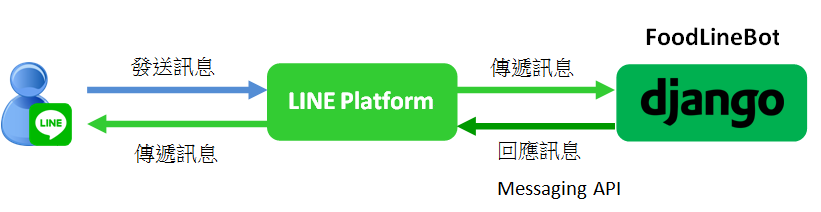

$ pip install django
 
$ pip install line-bot-sdk
 
$ pip install beautifulsoup4
 
$ pip install requests

- 建立專案

$ django-admin startproject mylinebot .  #建立Django專案
 
$ python manage.py startapp netflixlinebot  #建立Django應用程式
 
$ python manage.py migrate  #執行資料遷移(Migration)

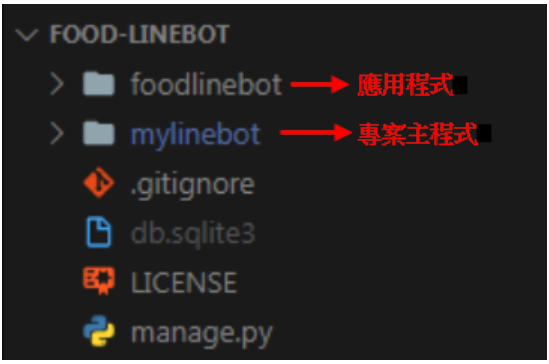

# setting.py 進行頻證連結

In [ ]:
LINE_CHANNEL_ACCESS_TOKEN = 'Messaging API的Channel access token'
 
LINE_CHANNEL_SECRET = 'Basic settings的Channel Secret'

# 在INSTALL_APPS\

連結app:='專案路徑名稱.apps.專案路徑名稱Config',


# 四、開發LINE Bot應用程式


# Views.py

In [1]:
from django.shortcuts import render
from django.http import HttpResponse, HttpResponseBadRequest, HttpResponseForbidden
from django.views.decorators.csrf import csrf_exempt
from django.conf import settings
 
from linebot import LineBotApi, WebhookParser
from linebot.exceptions import InvalidSignatureError, LineBotApiError
from linebot.models import MessageEvent, TextSendMessage

#進行憑證
line_bot_api = LineBotApi(settings.LINE_CHANNEL_ACCESS_TOKEN)
parser = WebhookParser(settings.LINE_CHANNEL_SECRET)
 
 
@csrf_exempt
def callback(request):
 
    if request.method == 'POST':
        signature = request.META['HTTP_X_LINE_SIGNATURE']
        body = request.body.decode('utf-8') # 更換成utf-8格式
 
        try:
            events = parser.parse(body, signature)  # 傳入的事件
        except InvalidSignatureError:
            return HttpResponseForbidden()
        except LineBotApiError:
            return HttpResponseBadRequest()
 
        for event in events:
            if isinstance(event, MessageEvent):  # 如果有訊息事件
                line_bot_api.reply_message(  # 回復傳入的訊息文字
                    event.reply_token,
                    TextSendMessage(text=event.message.text)
                )
        return HttpResponse()
    else:
        return HttpResponseBadRequest()

ImproperlyConfigured: Requested setting LINE_CHANNEL_ACCESS_TOKEN, but settings are not configured. You must either define the environment variable DJANGO_SETTINGS_MODULE or call settings.configure() before accessing settings.

# 在Django應用程式建立urls.py

In [ ]:
from django.urls import path
from . import views
 
urlpatterns = [
    path('callback', views.callback)
]

# 主專案的urls.py

In [ ]:
from django.contrib import admin
from django.urls import path, include
 
urlpatterns = [
    path('admin/', admin.site.urls),
    path('資料夾/', include('資料夾.urls')) #包含應用程式的網址
]

# 五、安裝Ngrok


https://ngrok.com/

# settings.py 設定
ALLOWED_HOSTS = [
    'cf3fb14f6910.ngrok.io'  #允許的網域名稱
]

# 在prompt輸入python manage.py runserver讓程式執行

在一般的網路世界中，用戶端(Client)會發送請求(Request)給伺服器端(Server)，處理完商業邏輯後，就會回傳結果(Response)給用戶端(Client)，如下圖：

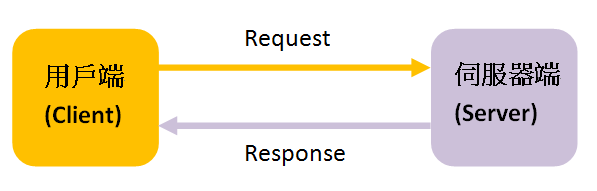

而Webhook機制就是除了擁有上面一般請求(Request)的流程外，還能夠主動推播訊息給用戶端(Client)，即便用戶端(Client)沒有向伺服器端(Server)發送請求(Request)，所以Webhook機制讓用戶端(Client)與伺服器端(Server)成了雙向的溝通，如下圖：

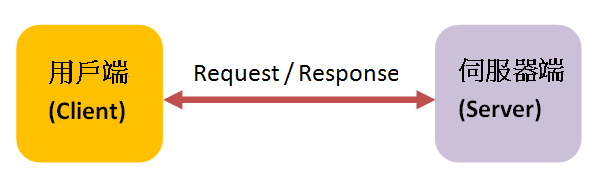

LINE Webhook URL位於LINE Developers開發者控制台的Messaging API頁籤中，如下圖：

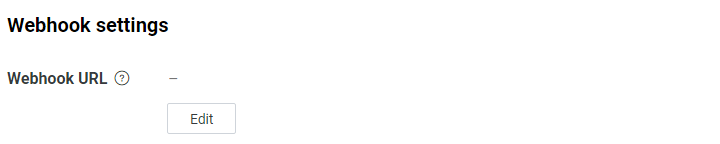

點擊「Edit」，輸入剛剛Ngrok所產生的HTTPS網址，如下圖：


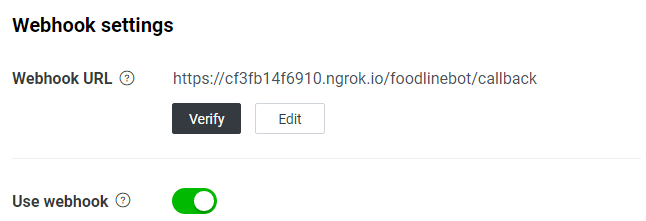


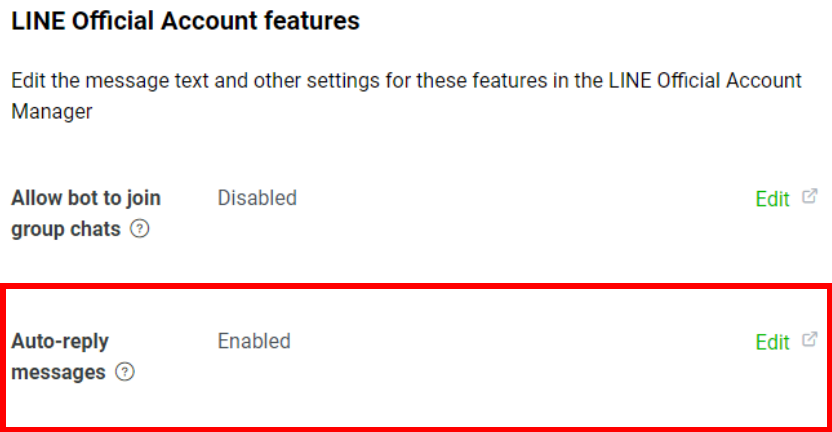

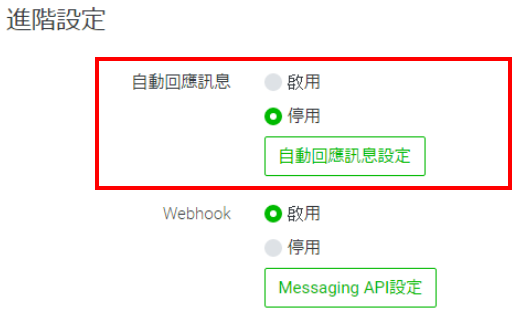

# 增加爬蟲功能

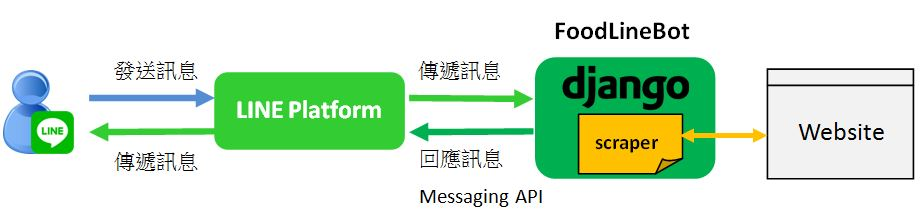


以NETFLIX為例，網頁後分類碼可找尋不同類型的作品，可用於代碼找尋隱藏的作品類型

舉例 : https://www.netflix.com/browse/genre/1365

https://www.netflix.com/browse/genre/ + "類型代碼"

In [ ]:
$ pip install requests
 
$ pip install beautifulsoup4

# 在應用程式(foodlinebot)下，新增一個scraper.py檔案
# 運用到物件導向多型觀念
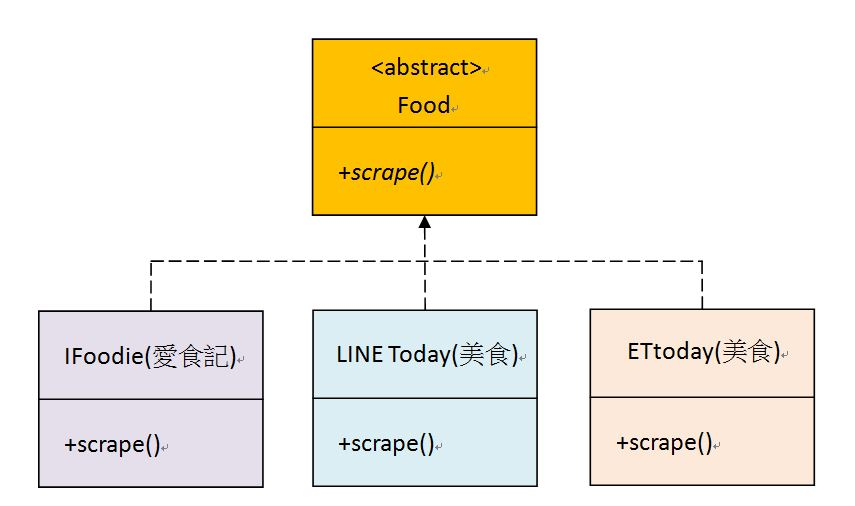

# scraper.py 

In [ ]:
from bs4 import BeautifulSoup
from abc import ABC, abstractmethod
import requests

#主類別名稱
class netflix(ABC):
 
    def __init__(self, num):
        self.gerneNum = num  # 種類數字

#抽象方法(abstractmethod)就是共同的介面，方便未來在其他子類別中做延伸
    @abstractmethod
    def scrape(self):
        pass

In [ ]:
class netflixScrape(netflix):

    
    def scrape(self):
            #取得網站所有內容
            response = requests.get(
                'https://www.netflix.com/tw/browse/genre/' + self.gerneNum
            )



# 抓取網頁後，將所要的元素抓下來

In [ ]:
class netflixScrape(netflix):

    
    def scrape(self):
            #取得網站所有內容
            response = requests.get(
                'https://www.netflix.com/tw/browse/genre/' + self.gerneNum
            )



            #解析網頁原始碼
            soup = BeautifulSoup(response.content, "lxml")

            cards = soup.find(
                'ul',{'class':'nm-content-horizontal-row-item-container'})
            
            genreTitle = soup.find(
                'div',{'class':'nm-collections-metadata-title'}
                ).get_text()

            content = '*******' + '前五項' + genreTitle + '*******'
            
            count = 0

            for card in cards:
                if count < 5:
                    title = card.find(
                        'span',{'class':'nm-collections-title-name'}
                    ).get_text()
                    
                    link = card.find(
                    'a',{'class':'nm-collections-title nm-collections-link'}
                    ).get('href')
                    
                    #將取得的作品名稱、連結一起，並且指派給content變數
                    content += f"\n 名稱: {title} \n 連結:{link} \n"
                    count+=1
                else:
                    break

                

            return content

# LINE Bot整合Python網頁爬蟲

## 開啟應用程式(netflix)下的views.py檔案，增加scraper.py檔案中的IFoodie類別(Class)


In [ ]:
from django.shortcuts import render
from django.http import HttpResponse, HttpResponseBadRequest, HttpResponseForbidden
from django.views.decorators.csrf import csrf_exempt
from django.conf import settings
 
from linebot import LineBotApi, WebhookParser
from linebot.exceptions import InvalidSignatureError, LineBotApiError
from linebot.models import MessageEvent, TextSendMessage
 
from .scraper import netflixScrape
 
line_bot_api = LineBotApi(settings.LINE_CHANNEL_ACCESS_TOKEN)
parser = WebhookParser(settings.LINE_CHANNEL_SECRET)

# callback fuction 中列出目前接收事件的資訊

In [ ]:
@csrf_exempt
def callback(request):
 
    if request.method == 'POST':
        signature = request.META['HTTP_X_LINE_SIGNATURE']
        body = request.body.decode('utf-8')
 
        try:
            events = parser.parse(body, signature)  # 傳入的事件
            print(events) #在cmd列出目前接收事件的資訊
 
        except InvalidSignatureError:
            return HttpResponseForbidden()
        except LineBotApiError:
            return HttpResponseBadRequest()
 
        for event in events:
            if isinstance(event, MessageEvent):  # 如果有訊息事件
                line_bot_api.reply_message(  # 回應傳入的訊息文字
                    event.reply_token,
                    TextSendMessage(text=event.message.text)
                )
        return HttpResponse()
    else:
        return HttpResponseBadRequest()

# 成功後，呼叫scrape.py的功能

In [ ]:
for event in events:
    if isinstance(event, MessageEvent):  # 如果有訊息事件
        netflix = netflixScrape(event.message.text)  #建構類別存入使用者傳入的訊息文字
        # 回應傳入的訊息文字
        line_bot_api.reply_message(
                event.reply_token, 
                TextSendMessage(text=netflix.scrape())
        )

# 新增按鈕樣板

## 先在view.py載入模組

In [ ]:
from linebot.models import (
    MessageEvent,
    TextSendMessage,
    TemplateSendMessage,
    ButtonsTemplate,
    MessageTemplateAction
)

## 在callback中新增字典，GerneDict存取該類型的名稱跟代碼

In [ ]:
GerneDict ={'冒險動作片':1365,'動畫':7424,'親子片':783,'經典電影':31574,'喜劇':6548,'Cult片':7627
        ,'紀錄片':6839,'劇情電影':5763,'信仰電影':26835,'多元性別':5977,'恐怖片':8711,'浪漫電影':8883,
        '科幻題材':1492,'運動類型':4370,'驚悚電影':8933,'電視節目':83
        }

# 事件中新增下列判斷式

In [ ]:
if event.message.text == "打開選單" or  event.message.text == "重新選擇":
                        
                        GerneList = random.sample(GerneDict.keys(), 3)

                        line_bot_api.reply_message(  # 回復傳入的訊息文字
                            event.reply_token,
                            # 注意這列，就是呼叫 TemplateSendMessage的格式
                            TemplateSendMessage(
                                alt_text='Buttons template',
                                template=ButtonsTemplate(
                                title='影視分類',
                                text='請選擇類型',
                                actions=[
                                    MessageTemplateAction(
                                        label='冒險動作片',
                                        text='1365'
                                    ),
                                    MessageTemplateAction(
                                        label='動畫',
                                        text='7424'
                                    ),
                                    MessageTemplateAction(
                                        label='親子片',
                                        text='783'
                                    )
                                ]
                            )
                        )
                    )
                    # 如果收到的訊息有在GerneDict裡的話
                    elif event.message.text in GerneDict:
                        netflix = netflixScrape(event.message.text)  #建構類別存入使用者傳入的訊息文字

                        line_bot_api.reply_message(  # 回應傳入的訊息文字
                            event.reply_token,
                            TextSendMessage(text=event.message.text)
                        )                      
                    else:

                        line_bot_api.reply_message(
                                event.reply_token
                                , TemplateSendMessage(
                                    alt_text='Buttons template',
                                    template=ButtonsTemplate(
                                    title='歡迎來到NETFLIX資訊站',
                                    text='請選擇功能',
                                    actions=[
                                        MessageTemplateAction(
                                            label='打開選單',
                                            text='打開選單')
                                            ]
                                            )
                                        )       
                                    ) 


# 使用圖片功能

In [ ]:
from linebot.models import (
    MessageEvent,
    TextSendMessage,
    TemplateSendMessage,
    ButtonsTemplate,
    MessageTemplateAction,
    PostbackEvent,
    PostbackTemplateAction
)

In [ ]:
template=ButtonsTemplate(
                                    title='影視分類',
                                    text='請選擇類型',
                                    actions=[
                                        MessageTemplateAction(
                                            label=GerneList[0],
                                            text=GerneList[0]
                                        ),
                                        MessageTemplateAction(
                                            label=GerneList[1],
                                            text=GerneList[1]
                                        ),
                                        MessageTemplateAction(
                                            label=GerneList[2],
                                            text=GerneList[2] 
                                        ),
                                        MessageTemplateAction(
                                            label='重新選擇',
                                            text='重新選擇' 
                                        )
                                    ]
                                )
                            )
                        )

# 在scrape.py中套入同樣模組

In [ ]:
from bs4 import BeautifulSoup 
from abc import ABC, abstractmethod
from linebot.models.events import ThingsEvent
import requests 
import time
from linebot import LineBotApi, WebhookParser
from linebot.exceptions import InvalidSignatureError, LineBotApiError
from linebot.models import ( MessageEvent,
    TextSendMessage,
    TemplateSendMessage,
    ButtonsTemplate,
    MessageTemplateAction,
    URITemplateAction,
    PostbackTemplateAction,
    CarouselTemplate,
     CarouselColumn
) # 插入想要套入的套件

# 在初始方法中加入字典跟接收到的字典格式

In [ ]:
def __init__(self, gerneName):
        GerneDict = {'冒險動作片':1365,'動畫':7424,'親子片':783,'經典電影':31574,'喜劇':6548,'Cult片':7627
        ,'紀錄片':6839,'劇情電影':5763,'信仰電影':26835,'多元性別':5977,'恐怖片':8711,'浪漫電影':8883,
        '科幻題材':1492,'運動類型':4370,'驚悚電影':8933,'電視節目':83
        }

        self.gerneNum = str(GerneDict[gerneName]) # 影音類別編號

# 在子類別新增格式

In [ ]:
def scrape(self):
        #取得網站所有內容
        response = requests.get(
            'https://www.netflix.com/tw/browse/genre/' + self.gerneNum
        )

        #解析網頁原始碼
        soup = BeautifulSoup(response.content, "lxml")

        cards = soup.find(
            'ul',{'class':'nm-content-horizontal-row-item-container'})
        
        genreTitle = soup.find(
            'div',{'class':'nm-collections-metadata-title'}
            ).get_text()

        content = '*******' + '前五名' + genreTitle + '*******'
        
        count = 0

        for card in cards:
            if count < 5:
                title = card.find(
                    'span',{'class':'nm-collections-title-name'}
                ).get_text()
                
                link = card.find(
                'a',{'class':'nm-collections-title nm-collections-link'}
                ).get('href')

                photo = card.find(
                'img',{'class':'nm-collections-title-img'}
                ).get('src')

                count+=1
            else:
                break

            buttons_template = TemplateSendMessage(
                alt_text='Buttons Template',
                template=ButtonsTemplate(
                title= '電影名稱',
                text=title,
                thumbnail_image_url=photo,
                actions=[
                        URITemplateAction(
                                    label='即刻觀賞',
                                    uri=link
                                ), MessageTemplateAction(
                                label='打開選單',
                                text='打開選單'
                            )]
                                
                        )
                    ) 
            return  buttons_template

In [ ]:
elif event.message.text in GerneDict:
                        netflix = netflixScrape(event.message.text)  #建構類別存入使用者傳入的訊息文字

                        line_bot_api.reply_message(
                                event.reply_token, 
                                netflix.scrape()
                                )

# 改成串聯圖表選單功能

In [ ]:
#抓取網站內容類別
class netflixScrape(netflix):

    def altText(url):
        
        response = requests.get(url)
            #解析網頁原始碼
        soup = BeautifulSoup(response.content, "lxml")

        content = soup.find(
                    'span',{'class':'title-data-info-item-list'}
                    ).get_text()
        return content

    def scrape(self):
        #儲存作品的卡片集
        movieList = []

        #取得網站所有內容
        response = requests.get(
            'https://www.netflix.com/tw/browse/genre/' + self.gerneNum
        )

        #解析網頁原始碼
        soup = BeautifulSoup(response.content, "lxml")

        cards = soup.find(
            'ul',{'class':'nm-content-horizontal-row-item-container'})
        

        count = 0

        for card in cards:
            if count < 5:
                #標題
                title = card.find(
                    'span',{'class':'nm-collections-title-name'}
                ).get_text()
                #連結
                link = card.find(
                'a',{'class':'nm-collections-title nm-collections-link'}
                ).get('href')

                #飾演
                content = "飾演:"+ netflixScrape.altText(link)
                
                #圖片
                photo = card.find(
                'img',{'class':'nm-collections-title-img'}
                ).get('src')
                
                #新增CarouselColumn格式，存入該作品的資料
                movieList.append(
                     CarouselColumn(
                        thumbnail_image_url=photo,
                        title=title,
                        text=content,
                        actions=[                             
                            URITemplateAction(
                                label='即刻觀賞',
                                uri= link
                            ),
                            MessageTemplateAction(
                                label='打開選單',
                                text='打開選單'
                            ),
                        ]
                    )
                )
               

                count+=1
            else:
                break

        # 先建置好格式再回傳到view的line_bot_api.reply_message()
        Carousel_template = TemplateSendMessage(
                alt_text='Carousel template',
                template= CarouselTemplate(
                columns=
                [movie for movie in movieList] #迴圈內所建置CarouselColumn格式
        )
        )
        return Carousel_template  

# 成功後，準備部屬heroku

# 之後在教